In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
map_table = np.loadtxt('region_labeled.csv')

In [3]:
print(map_table)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(1800, 1987)
844.6531346497068
146.33641287034087
195.65140009492168
214.44984515955298
231.74308943089432
258.7927326659251
273.2020792722547
308.4250366410898
285.24816694867457
300.10103244837757
284.9518377693283
350.2149638533229
324.6633119853614
347.0919591292759
363.9735605170388
375.56852248394006
414.0103092783505
408.44864864864866
393.87405458730683
413.77963446475195
409.28711692948525
438.06363818290976
400.2470588235294
423.61770365618986
400.3389121338912
416.0068836045056
448.56286721504114
421.46695095948826
438.3182743182743
429.08916083916085
493.8477117306681
453.1562401760453
487.2211446360153
505.597164034805
500.73904134650564
474.65864833906073
468.18631578947367
490.88811475409835
479.35704787234044
516.1952235490141
500.4113135186961
491.15432098765433
495.53521126760563
504.11355034065105
508.774449339207
563.9023945267959
498.5
544.4038748137109
548.4577056778679
513.0304568527919
514.2702702702703
526.0086538461538
531.814091680815
533.7852494577006
540.19

(-0.5, 1986.5, 1799.5, -0.5)

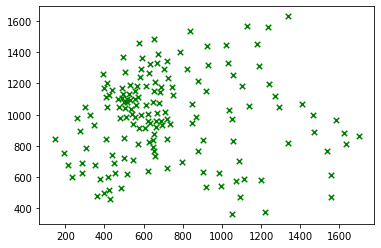

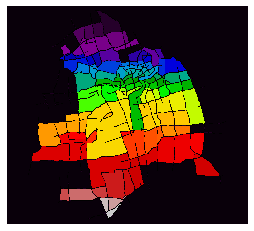

In [4]:
a=map_table.shape
x=[]
y=[]
print(a)
for  k in range(2,159):
    sum_x,sum_y,area=0,0,0
    for i in range(map_table.shape[0]):
        for j in range(map_table.shape[1]):
            if map_table[i][j]==k:
                sum_x += i
                sum_y += j
                area += 1
    x.append(round(sum_x/area))
    y.append(round(sum_y/area))
    print(sum_x/area)
plt.scatter(x,y,marker='x',color='g',s=30)
plt.figure('ccl')
plt.imshow(map_table, cmap='nipy_spectral')
plt.axis('off')

In [7]:
print(x,y)

x1=np.array(x)
np.save('x.npy',x1)
y1=np.array(y)
np.save('y.npy',y1)


[845, 146, 196, 214, 232, 259, 273, 308, 285, 300, 285, 350, 325, 347, 364, 376, 414, 408, 394, 414, 409, 438, 400, 424, 400, 416, 449, 421, 438, 429, 494, 453, 487, 506, 501, 475, 468, 491, 479, 516, 500, 491, 496, 504, 509, 564, 498, 544, 548, 513, 514, 526, 532, 534, 540, 562, 531, 557, 554, 574, 577, 557, 620, 592, 581, 574, 578, 586, 586, 610, 613, 630, 609, 623, 628, 652, 634, 847, 620, 633, 657, 649, 651, 673, 647, 669, 648, 662, 652, 666, 705, 718, 655, 661, 660, 718, 794, 680, 690, 683, 688, 725, 837, 709, 694, 752, 737, 746, 788, 720, 719, 820, 868, 879, 1056, 876, 917, 925, 903, 929, 902, 919, 987, 993, 1053, 1030, 1022, 1056, 1103, 1139, 1085, 1038, 1051, 1070, 1127, 1094, 1178, 1189, 1114, 1202, 1218, 1239, 1337, 1237, 1272, 1335, 1291, 1408, 1463, 1471, 1537, 1558, 1557, 1581, 1625, 1632, 1700] [945, 844, 753, 676, 598, 978, 898, 789, 690, 1049, 625, 677, 996, 933, 482, 585, 1202, 845, 1260, 1049, 1113, 743, 497, 517, 1170, 602, 688, 1129, 1160, 458, 1372, 626, 528, 1276,

(-0.5, 1986.5, 1799.5, -0.5)

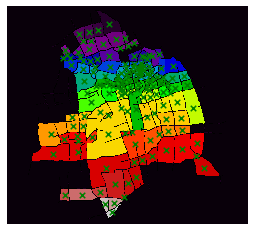

In [5]:

plt.figure('ccl')
plt.imshow(map_table, cmap='nipy_spectral')
plt.scatter(y,x,marker='x',color='g',s=30)
plt.axis('off')

In [6]:
ff = np.zeros((157,157))
for i in range(157):
    for j in range(157):
        ff[i][j] = ((x[i]-x[j])*(x[i]-x[j])+(y[i]-y[j])*(y[i]-y[j]))**0.5
print(ff)
np.savetxt('region_distance.csv', ff, fmt='%d')

[[   0.          706.25915923  676.80499407 ...  782.62123661
   798.66451029  858.64195099]
 [ 706.25915923    0.          103.83159442 ... 1479.46274032
  1486.4121232  1554.15571935]
 [ 676.80499407  103.83159442    0.         ... 1434.72122728
  1437.09150718 1508.23903941]
 ...
 [ 782.62123661 1479.46274032 1434.72122728 ...    0.
    72.33947747   76.4852927 ]
 [ 798.66451029 1486.4121232  1437.09150718 ...   72.33947747
     0.           88.72992731]
 [ 858.64195099 1554.15571935 1508.23903941 ...   76.4852927
    88.72992731    0.        ]]


In [7]:
f=np.zeros((157,157))
mm=0
for i in range(157):
    for j in range(157):
        if ff[i][j]>500:
            f[i][j] = math.exp(-2000*0.01)
        else :
            f[i][j] = math.exp(-ff[i][j]*0.01)

In [8]:
print(f)

[[1.00000000e+00 2.06115362e-09 2.06115362e-09 ... 2.06115362e-09
  2.06115362e-09 2.06115362e-09]
 [2.06115362e-09 1.00000000e+00 3.54050421e-01 ... 2.06115362e-09
  2.06115362e-09 2.06115362e-09]
 [2.06115362e-09 3.54050421e-01 1.00000000e+00 ... 2.06115362e-09
  2.06115362e-09 2.06115362e-09]
 ...
 [2.06115362e-09 2.06115362e-09 2.06115362e-09 ... 1.00000000e+00
  4.85102643e-01 4.65402374e-01]
 [2.06115362e-09 2.06115362e-09 2.06115362e-09 ... 4.85102643e-01
  1.00000000e+00 4.11766321e-01]
 [2.06115362e-09 2.06115362e-09 2.06115362e-09 ... 4.65402374e-01
  4.11766321e-01 1.00000000e+00]]


In [13]:
np.savetxt('region_distance2.csv', f)